<a href="https://colab.research.google.com/github/vijay-ram-ui/-Frt-project-/blob/main/Employee_burnout_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('/content/employee_burnout_analysis.xlsx')

In [ ]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
data.shape

(22750, 9)

In [ ]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
data['Date of Joining'] = pd.to_datetime(data['Date of Joining'])

In [ ]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
data.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [ ]:
data.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [ ]:
for i, col in enumerate(data.columns):
    print(f"\n\n{data[col].unique()}")
    print(f"\n{data[col].value_counts()}\n\n")



['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']

fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: Employee ID, Length: 22750, dtype: int64




['2008-09-30T00:00:00.000000000' '2008-11-30T00:00:00.000000000'
 '2008-03-10T00:00:00.000000000' '2008-11-03T00:00:00.000000000'
 '2008-07-24T00:00:00.000000000' '2008-11-26T00:00:00.000000000'
 '2008-01-02T00:00:00.000000000' '2008-10-31T00:00:00.000000000'
 '2008-12-27T00:00:00.000000000' '2008-03-09T00:00:00.000000000'
 '2008-03-16T00:00:00.000000000' '2008-05-12T00:00:00.000000000'
 '2008-01-20T00:00:00.000000000' '2008-02-23T00:00:00.000000000'
 '2008-

In [ ]:
data = data.drop(['Employee ID'],axis=1)

In [ ]:
data.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
intfloatdata = data.select_dtypes([np.int,np.float])
for i, col in enumerate(intfloatdata.columns):
    if (intfloatdata[col].skew() >= 0.1):
        print("\n", col, "feature is positively skewed and valueis:",intfloatdata[col].skew())
    elif (intfloatdata[col].skew() <= -0.1):
        print("\n", col, "feature is negatively skewed and valueis:",intfloatdata[col].skew())
    else:
        print("\n", col, "feature is normal distributed and valueis:",intfloatdata[col].skew())


 Designation feature is normal distributed and valueis: 0.09242138478903683

 Resource Allocation feature is positively skewed and valueis: 0.20457273454318103

 Mental Fatigue Score feature is negatively skewed and valueis: -0.4308950578815428

 Burn Rate feature is normal distributed and valueis: 0.045737370909640515


In [ ]:
data['Resource Allocation'].fillna(data['Resource Allocation'].mean(),inplace=True)
data['Mental Fatigue Score'].fillna(data['Mental Fatigue Score'].mean(),inplace=True)
data['Burn Rate'].fillna(data['Burn Rate'].mean(),inplace=True)

In [ ]:
data.isna().sum()

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [ ]:
data.corr()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.852046,0.656445,0.719284
Resource Allocation,0.852046,1.000000,0.739268,0.811062
Mental Fatigue Score,0.656445,0.739268,1.000000,0.878217
Burn Rate,0.719284,0.811062,0.878217,1.000000


In [ ]:
!pip install plotly

In [ ]:
import seaborn as sns
import plotly.express as px
corr = data.corr()
sns.set(rc={'figure.figsize':(14,12)})
fig = px.imshow(corr, text_auto=True, aspect='auto')
fig.show()

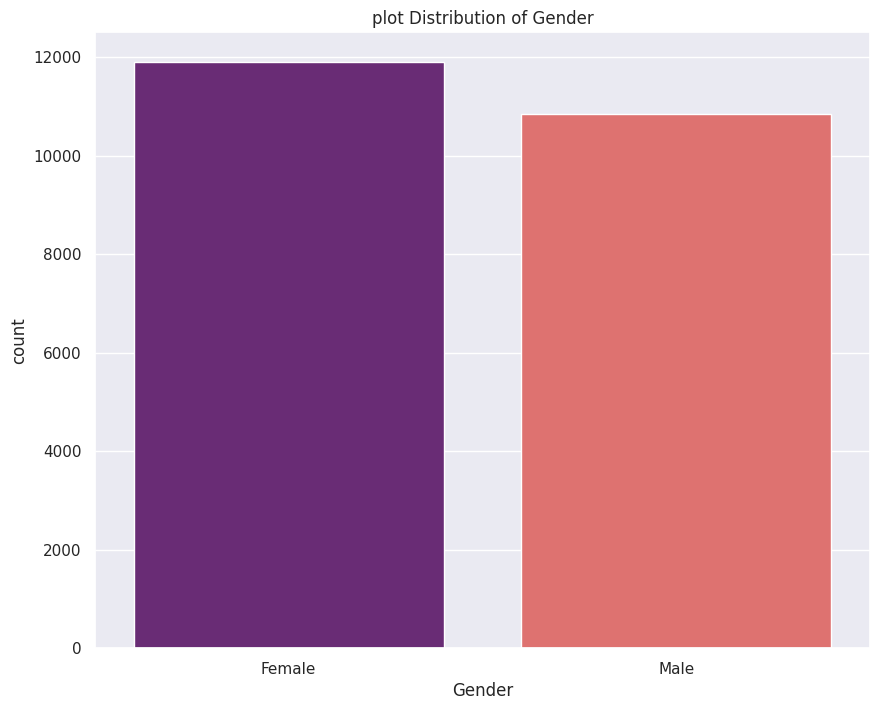

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
sns.countplot(x="Gender", data=data,palette='magma')
plt.title("plot Distribution of Gender")
plt.show()

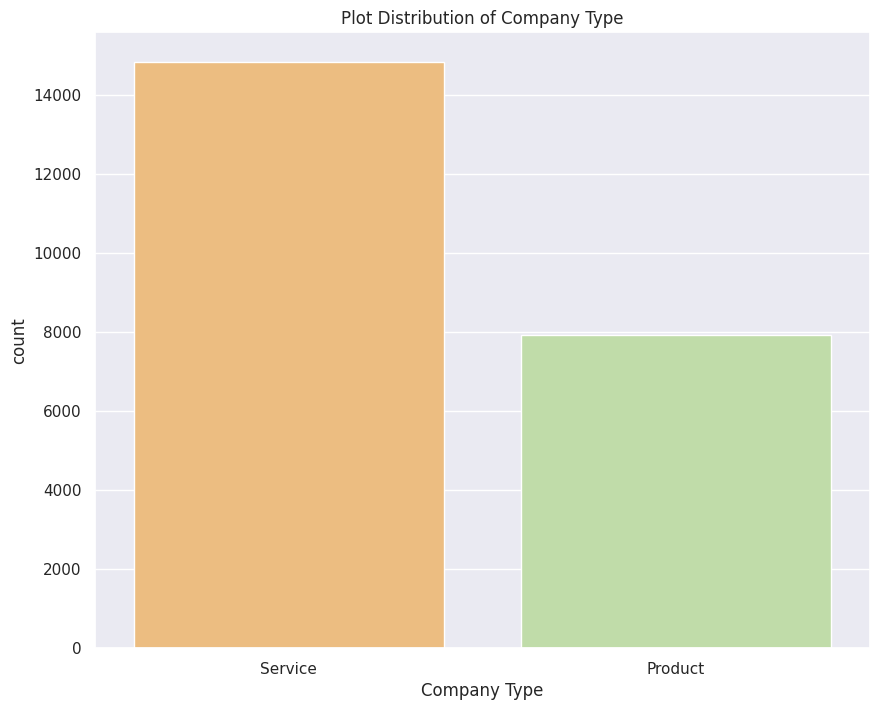

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="Company Type", data=data, palette="Spectral")
plt.title("Plot Distribution of Company Type")
plt.show()

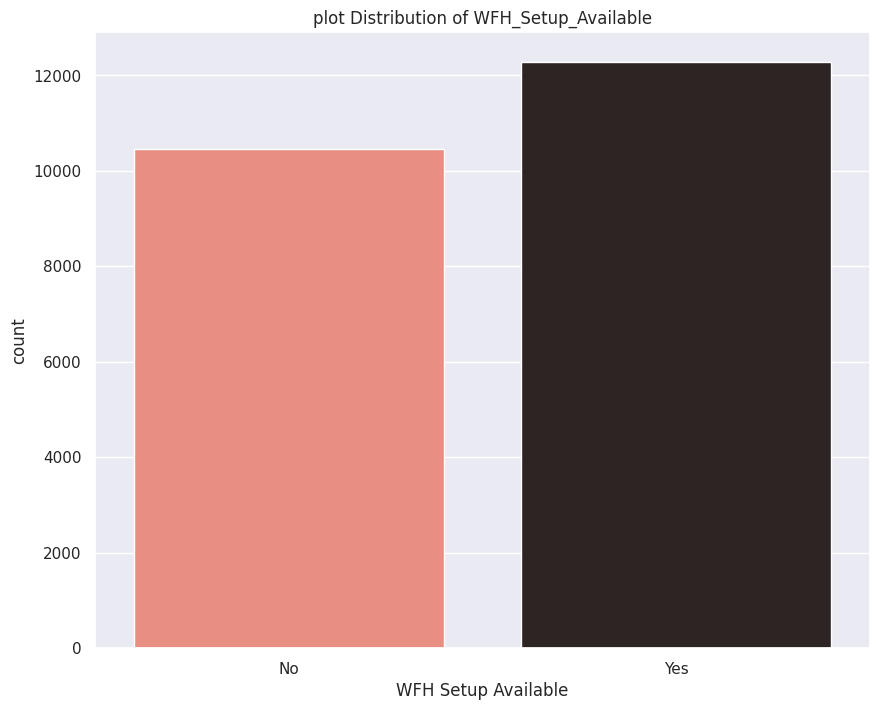

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="WFH Setup Available", data= data, palette="dark:salmon_r")
plt.title("plot Distribution of WFH_Setup_Available")
plt.show()

In [ ]:
burn_st = data.loc[:,'Date of Joining':'Burn Rate']
burn_st = burn_st.select_dtypes([int,float])
for i, col in enumerate(burn_st.columns):
    fig = px.histogram(burn_st, x=col, title="Plot Distribution of "+col, color_discrete_sequence=['indianred'])
    fig.update_layout(bargap=0.2)
    fig.show()

In [ ]:
fig = px.line(data, y="Burn Rate", color="Designation",title="Burn rate on the basis of Designation", color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.line(data, y= "Burn Rate",color="Gender",title="Burn rate on the basis of Gender", color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
fig = px.line(data, y= "Mental Fatigue Score",color="Designation",title="Mental fatigue vs Designation", color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
from sklearn import preprocessing
Label_encode = preprocessing.LabelEncoder()

In [ ]:
data['GenderLabel'] = Label_encode.fit_transform(data['Gender'].values)
data['Company_TypeLabel'] = Label_encode.fit_transform(data['Company Type'].values)
data['WFH_Setup_Available'] = Label_encode.fit_transform(data['WFH Setup Available'].values)

In [ ]:
gn = data.groupby('Gender')
gn = gn['GenderLabel']
gn.first()

Gender
Female    0
Male      1
Name: GenderLabel, dtype: int64

In [ ]:
data.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,GenderLabel,Company_TypeLabel,WFH_Setup_Available
0,2008-09-30,Female,Service,No,2,3.000000,3.8,0.16,0,1,0
1,2008-11-30,Male,Service,Yes,1,2.000000,5.0,0.36,1,1,1
2,2008-03-10,Female,Product,Yes,2,4.481398,5.8,0.49,0,0,1
3,2008-11-03,Male,Service,Yes,1,1.000000,2.6,0.20,1,1,1
4,2008-07-24,Female,Service,No,3,7.000000,6.9,0.52,0,1,0


In [ ]:
ct = data.groupby('Company Type')
ct = ct['Company_TypeLabel']
ct.first()

Company Type
Product    0
Service    1
Name: Company_TypeLabel, dtype: int64

In [ ]:
wsa = data.groupby('WFH Setup Available')
wsa = wsa['WFH_Setup_Available']
wsa.first()

WFH Setup Available
No     0
Yes    1
Name: WFH_Setup_Available, dtype: int64

In [ ]:
data.tail()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,GenderLabel,Company_TypeLabel,WFH_Setup_Available
22745,2008-12-30,Female,Service,No,1,3.0,5.728188,0.41,0,1,0
22746,2008-01-19,Female,Product,Yes,3,6.0,6.700000,0.59,0,0,1
22747,2008-11-05,Male,Service,Yes,3,7.0,5.728188,0.72,1,1,1
22748,2008-01-10,Female,Service,No,2,5.0,5.900000,0.52,0,1,0
22749,2008-01-06,Male,Product,No,3,6.0,7.800000,0.61,1,0,0


In [ ]:
Columns = ['Designation','Resource Allocation','Mental Fatigue Score','GenderLabel','Company_TypeLabel','WFH_Setup_Available']
x=data[Columns]
y = data['Burn Rate']

In [ ]:
print(x)

       Designation  Resource Allocation  Mental Fatigue Score  GenderLabel  \
0                2             3.000000              3.800000            0   
1                1             2.000000              5.000000            1   
2                2             4.481398              5.800000            0   
3                1             1.000000              2.600000            1   
4                3             7.000000              6.900000            0   
...            ...                  ...                   ...          ...   
22745            1             3.000000              5.728188            0   
22746            3             6.000000              6.700000            0   
22747            3             7.000000              5.728188            1   
22748            2             5.000000              5.900000            0   
22749            3             6.000000              7.800000            1   

       Company_TypeLabel  WFH_Setup_Available  
0              

In [ ]:
print(y)

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 22750, dtype: float64


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
x_pca = pca.fit_transform(x)

print("PCA shape of x is :",x_pca.shape, "and orignal shape is :", x.shape)
print("% of important of selected features is : ", pca.explained_variance_ratio_)
print("The number of features slected through PCA is :", pca.n_components_)

PCA shape of x is : (22750, 4) and orignal shape is : (22750, 6)
% of important of selected features is :  [0.78371089 0.11113597 0.03044541 0.02632422]
The number of features slected through PCA is : 4


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.25,random_state=10)


In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(17062, 4) (5688, 4) (17062,) (5688,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([0.36765013, 0.69779684, 0.46238222, ..., 0.8371099 , 0.48493593,
       0.80517885])

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
accuracy = r2_score(y_test,y_pred)
print("Accuracy : ",accuracy*100)

Accuracy :  82.93668111291458
